In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import cross_val_score


In [36]:
#load dataset and preview it

df = pd.read_csv('email_set.csv')

print(df.shape)

X = df['text']
y = df['label']

vectorizer = TfidfVectorizer(
    max_features = 5000,
    min_df = 5,
    stop_words = 'english'
)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 42, stratify = y )

#Convert text into numerical features because logistic regression in scikit-learn cannot work with raw-text 

X_train_vec = vectorizer.fit_transform(X_train)

X_test_vec = vectorizer.transform(X_test)


(83448, 2)


In [37]:
#create training model based and use it to test
model = LogisticRegression(max_iter = 100, C = 0.3)

#trains model on the 80% of the data
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)

#the training accuracy is greater than the test accuracy. CLear sign of overfitting, change C parameter 


Training Accuracy: 0.9801671709757632
Testing Accuracy: 0.979089275014979
----------------------------------------
Confusion matrix displayed above
----------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      7908
           1       0.97      0.99      0.98      8782

    accuracy                           0.98     16690
   macro avg       0.98      0.98      0.98     16690
weighted avg       0.98      0.98      0.98     16690

----------------------------------------
5-Fold Cross-Validation Accuracy (Train Set): [0.97828041 0.97708209 0.97790593 0.97655606 0.97648116]
Mean CV Accuracy: 0.9772611299764181


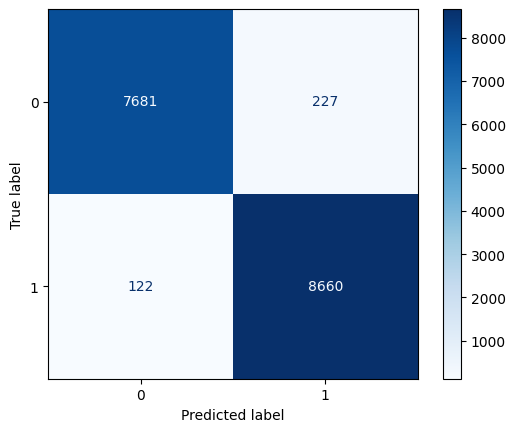

In [38]:
# evaluating the model

# --- 1. Accuracy ---
train_acc = accuracy_score(y_train, model.predict(X_train_vec))
test_acc = accuracy_score(y_test, y_pred)

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)
print("-" * 40)

# --- 2. Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')
print("Confusion matrix displayed above")
print("-" * 40)

# --- 3. Precision, Recall, F1-Score ---
print("Classification Report:\n")
print(classification_report(y_test, y_pred))
print("-" * 40)

# --- 4. Cross-Validation on training set ---
cv_scores = cross_val_score(model, X_train_vec, y_train, cv=5)
print("5-Fold Cross-Validation Accuracy (Train Set):", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
